In [161]:
import random

import numpy as np

import math

import seaborn as sns

import pandas as pd

# Global

In [162]:
n_trials = 20

size_range = range(3, 8)

# Functions

In [163]:
def init_grid(size):
    n_elements = size**2
    elements = np.arange(n_elements)
    elements = np.repeat(elements, 2)[:n_elements]
    np.random.shuffle(elements)
    return list(elements)

In [164]:
def pick(grid, flipped):
    pos = random.choice(flipped)
    return grid[pos], pos

In [165]:
def collect_data(n_trials, size_range, strategy):
    data = []
    for size in size_range:
        data_size = []
        for n in range(n_trials):
            data_size.append(math.log10(strategy(size)))
        data.append(data_size)
    return data

# Random selectivity

In [166]:
def play_random(size):
    counter = 0

    grid = init_grid(size)
    flipped = list(range(size**2))

    while len(flipped) > 1:
        el1, pos1 = pick(grid, flipped)
        
        flipped_cp = flipped.copy()
        flipped_cp.remove(pos1)
        el2, pos2 = pick(grid, flipped_cp)

        if el1 == el2:
            flipped.remove(pos1)
            flipped.remove(pos2)
            
        counter+=1
    
    return counter/(size**2)


# 1st Perfect Memory

In [167]:
def play_first_pm(size):
    counter = 0

    grid = init_grid(size)
    flipped = list(range(size**2))
    memory =  [None]*(size**2)

    while len(flipped) > 1:
        el1, pos1 = pick(grid, flipped)
        memory[pos1] = el1

        if el1 in memory and pos1 != memory.index(el1):
            el2 = el1
            pos2 = memory.index(el1)
        else:
            flipped_cp = flipped.copy()
            flipped_cp.remove(pos1)
            el2, pos2 = pick(grid, flipped_cp)

        if el1 == el2:
            flipped.remove(pos1)
            flipped.remove(pos2)

        counter+=1
    
    return counter/(size**2)

# 2nd Perfect Memory

In [168]:
def play_second_pm(size):
    counter = 0

    grid = init_grid(size)
    flipped = list(range(size**2))
    memory =  [None]*(size**2)

    while len(flipped) > 1:
        el1, pos1 = pick(grid, flipped)

        if el1 in memory and pos1 != memory.index(el1):
            el2 = el1
            pos2 = memory.index(el1)
        else:
            flipped_cp = flipped.copy()
            flipped_cp.remove(pos1)
            el2, pos2 = pick(grid, flipped_cp)
        memory[pos2] = el2


        if el1 == el2:
            flipped.remove(pos1)
            flipped.remove(pos2)

        counter+=1
    
    return counter/(size**2)

# Perfect Memory

In [169]:
def play_pm(size):
    counter = 0

    grid = init_grid(size)
    flipped = list(range(size**2))
    memory =  [None]*(size**2)

    while len(flipped) > 1:
        el1, pos1 = pick(grid, flipped)
        memory[pos1] = el1

        if el1 in memory and pos1 != memory.index(el1):
            el2 = el1
            pos2 = memory.index(el1)
        else:
            flipped_cp = flipped.copy()
            flipped_cp.remove(pos1)
            el2, pos2 = pick(grid, flipped_cp)
        memory[pos2] = el2

        if el1 == el2:
            flipped.remove(pos1)
            flipped.remove(pos2)

        counter+=1
    
    return counter/(size**2)

# Collect data

In [170]:
rand = collect_data(n_trials, size_range, play_random)
first_pm = collect_data(n_trials, size_range, play_first_pm)
second_pm = collect_data(n_trials, size_range, play_second_pm)
pm = collect_data(n_trials, size_range, play_pm)

In [171]:
rand_df = pd.melt(pd.DataFrame(rand).T, var_name='size', value_name='nclicks')
rand_df['strategy'] = 'Random'

first_pm_df = pd.melt(pd.DataFrame(first_pm).T, var_name='size', value_name='nclicks')
first_pm_df['strategy'] = 'First perfect memory'

second_pm_df = pd.melt(pd.DataFrame(second_pm).T, var_name='size', value_name='nclicks')
second_pm_df['strategy'] = 'Second perfect memory'

pm_df = pd.melt(pd.DataFrame(pm).T, var_name='size', value_name='nclicks')
pm_df['strategy'] = 'Perfect memory'

In [172]:
data = pd.concat([rand_df, first_pm_df, second_pm_df, pm_df])

# Plot

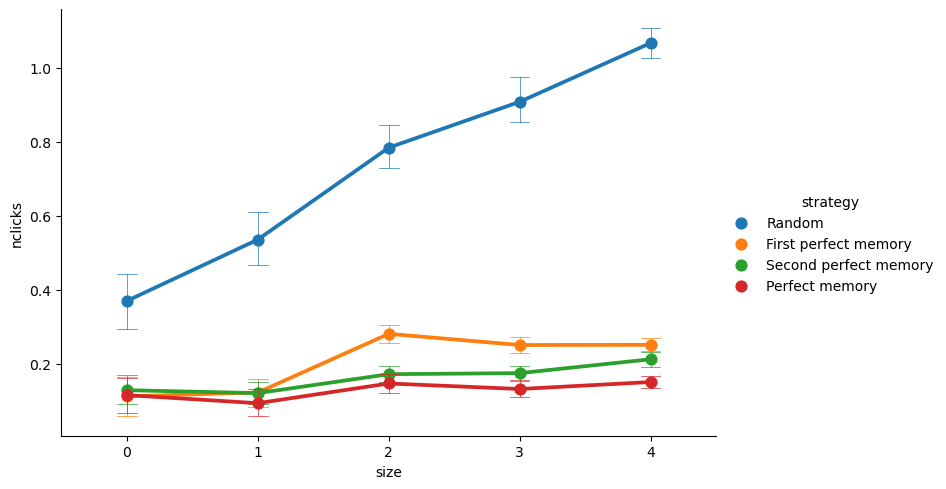

In [173]:
sns.catplot(x="size", y='nclicks', hue="strategy", kind="point", 
            capsize=.15, data=data, aspect=1.5, errwidth=0.5)